In [28]:
import cv2
import numpy as np
import mediapipe as mp
import pandas as pd
import math
from tqdm.notebook import tqdm
import time
import pyautogui
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import csv

In [30]:
def RotateImage(img, angle, scale=1):
    if img.ndim > 2:
        height, width, channel = img.shape
    else:
        height, width = img.shape
 
    matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, scale)
    result = cv2.warpAffine(img, matrix, (width, height))
 
    return result
 
img = cv2.imread('./flp/traindata_forrotation/pw000001.jpg')
 
rad = 20 * math.pi / 180	# 각도 설정
res = RotateImage(img, -30, 1)
res2 = RotateImage(img, 30, 1)
cv2.imshow('original', img)
cv2.imshow('result', res)
cv2.imshow('result2', res2)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# import glob
# import os
# import csv
# path = './flp/traindata_forrotation/'
# file_list = os.listdir(path)
# jpg_file_list = [file for file in file_list if file.endswith(".jpg")]
# print("len(jpg_file_list):",len(jpg_file_list))
# print(jpg_file_list[:3])

len(jpg_file_list): 3041
['1.jpg', '10.jpg', '101.jpg']


In [7]:
# #빈리스트 준비
# photo_data = []
# IMAGE_FILES = jpg_file_list[0]
# # IMAGE_FILES = ['r99999.jpg']
# #사진상 사람의 코 위치 검출
# mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles
# mp_holistic = mp.solutions.holistic

# #메모장생성
# f = open('./flp/waste_autosave002.csv', 'w', newline='')
# writer = csv.writer(f)

# with mp_holistic.Holistic(
#     static_image_mode=True,
#     model_complexity=2,
#     enable_segmentation=True,
#     refine_face_landmarks=True) as holistic:
#     idx=0
#     for file in tqdm(IMAGE_FILES):
# #         img = cv2.imread('./flp/traindata_forrotation/'+file)
#         img = cv2.imread('./flp/traindata_forrotation/r467.jpg')
        
#         for angle in range(0, 181, 30):
#             for size in range(4, 11,3):
#                 rad = 20 * math.pi / 180	# 각도 설정
#                 image = RotateImage(img, angle-90, size/10)
#                 results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                 
# ########################################################################################################
# #prepare data#                
#                 if results.pose_landmarks:
#                     n=[]
#                     for data_point in results.pose_landmarks.landmark:
#                         n.append(data_point.x)
#                         n.append(data_point.y)
#                         n.append(data_point.z)
#                     n.append(angle)
                    
#                     photo_data.append(n)
#                     writer.writerows([n])

#                 else:
#                     continue
# f.close()

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
xtrain = [[1,2,3],[2,4,6]]

In [14]:
f = open('./flp/good.csv', 'w', newline='')
writer = csv.writer(f)
writer.writerows(xtrain)
f.close()

In [9]:
gooddata = pd.read_csv('./flp/photo_data_autosave001.csv')
gooddata.head()

,0.6892549991607666,0.5014917254447937,-0.06351453810930252,0.6976113319396973,0.5061488151550293,-0.036377351731061935,0.6966025829315186,0.5078433752059937,-0.036572106182575226,0.6958777904510498,...,0.2075291872024536,0.43805810809135437,-0.003088307334110141,0.17975690960884094,0.49832504987716675,-0.030859315767884254,0.2226533442735672,0.40989112854003906,-0.1540631204843521,0
0,0.831279,0.500062,-0.174676,0.846265,0.508293,-0.129999,0.844589,0.512135,-0.130346,0.842393,...,0.008268,0.392020,0.082371,-0.032575,0.501195,0.030034,0.016174,0.339984,-0.129662,0
1,0.972774,0.504458,-0.373511,0.995981,0.512687,-0.326550,0.994872,0.519232,-0.326938,0.994485,...,-0.082037,0.376704,0.272060,-0.080560,0.523208,0.192376,-0.092805,0.359878,-0.018496,0
2,0.664644,0.441728,-0.074085,0.675970,0.443035,-0.051923,0.676875,0.445470,-0.052125,0.678099,...,0.196481,0.533883,0.015073,0.218344,0.592590,-0.047316,0.183215,0.505699,-0.107476,30
3,0.789825,0.400627,-0.197299,0.808675,0.404283,-0.151100,0.808914,0.407940,-0.151416,0.810477,...,0.009635,0.554429,0.224154,0.024759,0.663435,0.074767,-0.069620,0.547639,-0.008173,30
4,0.914993,0.354742,-0.148703,0.937248,0.359367,-0.094656,0.938785,0.366674,-0.095067,0.939586,...,-0.199616,0.558416,0.200988,-0.114956,0.677692,0.045454,-0.246177,0.531959,-0.067985,30


In [11]:
print(len(photo_data))
print("저장완료")

51160
저장완료


In [10]:
photo_data = pd.read_csv('./flp/photo_data_autosave001.csv', header=None).to_numpy()
photo_data.shape

(51160, 100)

In [11]:
photo_data[1][0]

0.8312792778015137

In [12]:
print("전체데이터 개수 :",len(photo_data))
photo_data = photo_data.tolist()

전체데이터 개수 : 51160


In [13]:
x = []
y = []
for i in tqdm(photo_data):
    x.append(i[:99])
    y.append([i[99]])

  0%|          | 0/51160 [00:00<?, ?it/s]

In [14]:
y[:1]

[[0.0]]

In [15]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(x, y, 
                                                      test_size=0.2, 
                                                      shuffle=True,  
                                                      random_state=42)

In [16]:
import numpy as np

# 데이터셋 생성
train_data = np.array(train_data)
train_targets = np.array(train_targets)
test_data = np.array(test_data)
test_targets = np.array(test_targets)

print("traindata shape:",train_data.shape)
print("traintarget shape:",train_targets.shape)

traindata shape: (40928, 99)
traintarget shape: (40928, 1)


In [17]:
from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(2, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [18]:
k = 2

num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  # 검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()  # 케라스 모델 구성(컴파일 포함)
    model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
              epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # 검증 세트로 모델 평가
    all_scores.append(val_mae)

처리중인 폴드 # 0
Epoch 1/50
 1166/20464 [>.............................] - ETA: 29s - loss: 5724.3140 - mae: 58.2560

KeyboardInterrupt: 

In [23]:
num_epochs = 30
all_mae_histories = []
for i in tqdm(range(k)):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  #검증 데이터 준비: k번째 분할    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()  # 케라스 모델 구성(컴파일 포함)
    history = model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

  0%|          | 0/2 [00:00<?, ?it/s]

처리중인 폴드 # 0
처리중인 폴드 # 1


In [24]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

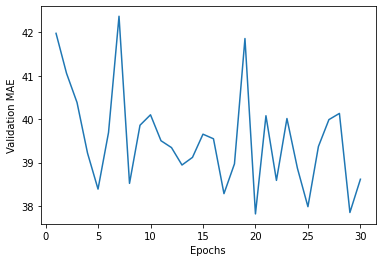

In [25]:
import matplotlib.pyplot as plt



plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [27]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

320/320 [==============================] - 0s 995us/step - loss: 406.2611 - mae: 10.7406


In [19]:
model = build_model()  # 새롭게 컴파일된 모델을 얻습니다.
model.fit(train_data, train_targets,  # 전체 데이터로 훈련시킵니다.
          epochs=30, batch_size=64, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/30
640/640 [==============================] - 2s 2ms/step - loss: 1556.9698 - mae: 27.5648
Epoch 2/30
640/640 [==============================] - 1s 2ms/step - loss: 590.7935 - mae: 16.3513
Epoch 3/30
640/640 [==============================] - 1s 2ms/step - loss: 501.2663 - mae: 14.3023
Epoch 4/30
640/640 [==============================] - 1s 2ms/step - loss: 454.0519 - mae: 13.0334
Epoch 5/30
640/640 [==============================] - 1s 2ms/step - loss: 427.6635 - mae: 12.2954
Epoch 6/30
640/640 [==============================] - 1s 2ms/step - loss: 411.0228 - mae: 11.7710
Epoch 7/30
640/640 [==============================] - 1s 2ms/step - loss: 401.1455 - mae: 11.5035
Epoch 8/30
640/640 [==============================] - 1s 2ms/step - loss: 392.8449 - mae: 11.2311
Epoch 9/30
640/640 [==============================] - 1s 2ms/step - loss: 383.7356 - mae: 11.0328
Epoch 10/30
640/640 [==============================] - 1s 2ms/step - loss: 376.0944 - mae: 10.8537
Epoch 11/30
640/64

In [40]:
test_mse_score
test_mae_score

10.707258224487305

In [41]:
print(model.predict([photo_data[0][:99]]))

print(photo_data[0][99])

1/1 [==============================] - 0s 52ms/step
[[1.6354604]]
0.0


In [22]:
def get_angle(data):
    p = model.predict(data)[0][0]
    return p-90

In [68]:
print("현재 영상의 기울어짐")
get_angle([photo_data[0][:99]])

현재 영상의 기울어짐
1/1 [==============================] - 0s 66ms/step


-78.65799903869629

In [44]:
model.save('./flp/model/flp_horizon_correction003.h5')

In [26]:
import tensorflow as tf
model = tf.keras.models.load_model('./flp/model/flp_horizon_correction003.h5')

# test_loss, test_acc = model.evaluate(test_data, test_targets, verbose=2)

In [27]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture('./flp/traindata_forrotation/rotate001.mp4')
idx=0
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        idx+=1
#         time.sleep(0.001)
#         pyautogui.PAUSE = 1    # 딜레이 관련 (default = 0.1 초)
        pyautogui.FAILSAFE = False  # 강제 초기화 비활성
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
    # If loading a video, use 'break' instead of 'continue'.
            break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)
        
        n=[]
        visibility =[]
        if results.pose_landmarks:
            for data_point in results.pose_landmarks.landmark:
                n.append(data_point.x)
                n.append(data_point.y)
                n.append(data_point.z)
                visibility.append(data_point.visibility)
        else:
            for _ in range(99):
                n.append(0)
        
        nowdata=[n]
        
        life_probability = get_angle(nowdata)
        text="angle : {}".format(round(life_probability,2))
        org=(30,30)
        font=cv2.FONT_HERSHEY_SIMPLEX
 
    # Draw landmark annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        save_image = image.copy()
#         mp_drawing.draw_landmarks(
#             image,
#             results.face_landmarks,
#             mp_holistic.FACEMESH_CONTOURS,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        
        cv2.putText(image,text,org,font,1,(255,0,0),2)
    # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Holistic', image)
        if cv2.waitKey(1) & 0xFF == 27:
            break

cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 33ms/step
